<a href="https://colab.research.google.com/github/lorek/test3/blob/main/LAB_LIST_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Click above to open the notebook in Google Colab. Then save it to your Google Drive)

# Laboratorium z rachunku prawdopodobieństwa
# Lista 4

#Rozgrzewka: klasyczne zagadnienie ruiny gracza

Gramy w następującą grę: mając $0<i<M$ PLN (gdzie $M>1$ jest ustaloną liczbą naturalną)  w jednym kroku wygrywamy 1 PLN z prawdopodobieństwem $p_i$ lub przegrywamy 1 PLN z prawdopodobieństwem $q_i$, gdzie $p_i>0, q_i>0, p_i+q_i\leq 1$. Gra się kończy jeśli będziemy mieli 0 PLN (**przegraliśmy**) lub $M$ PLN (**wygraliśmy**). Niech $\rho(i)$ oznacza prawdopodobieństwo wygrania startując z $i$ PLN.
Przykład z $M=3$, $p_1=1/4, q_1=1/3, p_2=1/2, q_2=1/3$ można zobrazować następująco:


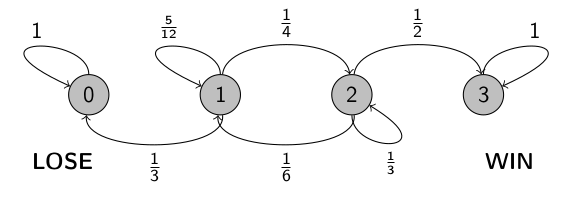

**Klasyczne** zagadnienie odnosi się do sytuacji, gdy $p_i=p, q_i=1-p, p\in(0,1)$. Wiadomo wówczas, iż

$$\rho(i)=
\left\{
  \begin{array}{llllll}
  {i\over M} & \textrm{jeśli } & p={1\over 2}\\[5pt]
 \displaystyle {1-\left({1-p\over p}\right)^i\over 1-\left({1-p\over p}\right)^M} & \textrm{jeśli } & p\neq{1\over 2}
  \end{array}
  \right.
  $$




Dla $M=50$ oraz $p=0.48$ wyestymujemy $\rho(j)$ dla $j\in\{10,15,20,25,30,35,40\}$ i porównamy z prawdziwymi wartościami symulując $R=1000$ gier dla każdego $j$. Wyniki przedstawimy na wykresie.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:

#Naiwna implementacja:

M=50
p=0.48

init_states=np.array([10,15,20,25,30,35,40])

R = 1000

rho=np.zeros(len(init_states))

for nr,state in enumerate(init_states):
  print("state = ", state)
  for iter in np.arange(R):
    st = state
    while( (st>0) and (st<M)):
      U=np.random.uniform(0,1)
      if U<p:
        st=st+1
      else:
        st=st-1

    if(st==M):
      rho[nr]=rho[nr]+1

rho = rho/R


[0. 0. 0. 0. 0. 0. 0.]
state =  10
state =  15
state =  20
state =  25
state =  30
state =  35
state =  40


In [10]:
def compute_true_rho_constant_p(w,p):
  if p == 0.5:
    rho_true = w / M
  else:
    rho_true = (1 - ((1 - p) / p)**w) / (1 - ((1 - p) / p)**M)
  return rho_true

all_init_states=np.arange(M)
rho_all = compute_true_rho_constant_p(all_init_states,p)

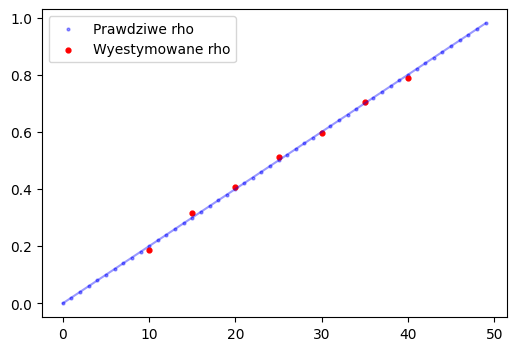

In [19]:
fig, ax = plt.subplots(figsize=(6, 4) )

ax.scatter(all_init_states, rho_all,s=4, color="blue", label="Prawdziwe rho", alpha=0.4)
ax.plot(all_init_states, rho_all, color="blue", alpha=0.4)
ax.scatter(init_states, rho,s=12, color='red', label="Wyestymowane rho")
plt.legend()

# Ćwiczenie: czas trwania gry
W powyższym przykładzie ($M=50, p=0.48,$ te same $\texttt{init_states}$) wyestymuj $\tau(j)$, czas trwania gry = liczba kroków potrzebnych do zakończenia gry (wygrania lub przegrania). Wyniki zobrazuj na wykresie.

# ZADANIE

* a) Wyestymuj $\rho(j)$ dla $M=50,$ `init_states=np.array([10,15,20,25,30,35,40])` z  prawdopodobieństwami wygrania/przegrania w jednym kroku:
$$p_i=0.12,\quad  q_i=0.13, \quad 1-p_i-q_i=0.75$$
* b) Wyestymuj $\rho(j)$ dla $M=50,$ `init_states=np.array([10,15,20,25,30,35,40])` ze zemiennymi prawdopodobieństwami wygrania/przegrania w jednym kroku:
$$p_i={0.24 \over 2i+1}, q_i={0.26\over 2i+1}$$

Wyniki zobrazuj na wykresie..

Co możesz powiedzieć o wynikach z punktu a) i b) (również porównując z przykładem z ćwiczenia)?

# ZADANIE: MODEL EHRENFESTÓW

(Model wymiany cząsteczek). Mamy dwa pojemniki A oraz B oraz łącznie $M$ cząsteczek. Początkowo w pojemniku $A$ jest $0<i<M$ cząsteczek (zatem w pojemniku $B$ jest ich $M-i$). Stanem określamy liczbę cząsteczek w pojemniku $A$. W jednym kroku losowana jest jednostajnie jedna z $M$ kul, a następnie przekładana jest do drugiego pojemnika. Szansa, że przejdziemy ze stanu $i$ do stanu $i+1$ (czyli zwiększymy liczbę cząstek w pojemniku 1) wynosi $p_i={M-i\over M}$ (prawd. wylosowania cząstki z pojemnika $B$), natomiast szansa przejścia ze stanu $i$ do $i-1$ wynosi ${i\over M}$ (prawd. wylosowania cząstki z pojemnika $A$).
* *Pytanie* Jakie jest prawdopodobieństwo, że startując z $i$ cząstek w pojemniku $A$ zdarzenie {*wszystkie cząstki są w pojemniku* A} nastąpi przed zdarzeniem {*wszystkie cząstki są w pojemniku* B}? Wyestymuj te prawdopodobieństwa poprzez symulacje dla $M=50$ oraz róznymi stanami początkowymi `init_states=np.array([10,15,20,25,30,35,40])`. Wyniki zobrazuj na wykresie.
